## Data Exploration

Did two recordings of the first track, one foward and the other in  backward direction, making three laps with each one, no brake used, but did slowdown on curves. (for this track maybe it's possible to do it in max speed but the second track probably needs speed changes)

Is only 5000 samples, (well 15000 because there are left, center and right images).

Next seeing the distributions of the speed, 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
from sklearn.model_selection import train_test_split
%matplotlib inline

driving_log = pd.read_csv('run1/driving_log.csv', names=['center_img', 'left_img', 'right_img', 'steering_angle', 'throttle', 'break', 'speed' ])


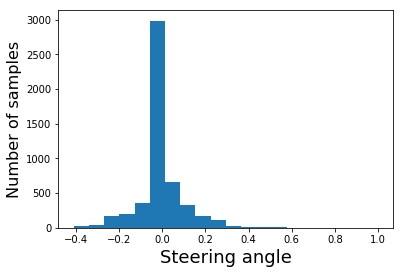

In [2]:
num_bins = 20
steering_angle = driving_log.steering_angle
steering_angle_hist, steering_angle_bins = np.histogram(steering_angle, num_bins)

def plot_stering_angle(steering_angle):
    plt.hist(steering_angle, steering_angle_bins)
    plt.xlabel('Steering angle', fontsize=18)
    plt.ylabel('Number of samples', fontsize=16)
    plt.show() 

plot_stering_angle(steering_angle)

In [3]:
count_bins = [] 
for i in range(len(steering_angle_bins)-1):
    count_bins.append(len(driving_log.steering_angle[(driving_log.steering_angle > steering_angle_bins[i]) & (driving_log.steering_angle <= steering_angle_bins[i+1])  ]))

cut_line = int(np.mean(count_bins)*3)

for i,v in zip(range(len(count_bins)), count_bins):
    if v > cut_line:
        all_samples = driving_log[(driving_log.steering_angle > steering_angle_bins[i]) & (driving_log.steering_angle <= steering_angle_bins[i+1])  ]
        driving_log = driving_log.drop(all_samples.sample(v - cut_line).index)
        

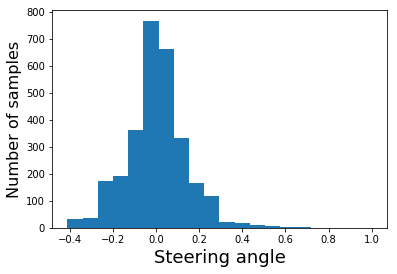

In [4]:
plot_stering_angle(driving_log.steering_angle)

## Data Transformation

The basic idea is to crop the images to train a smaller image just the information of interest.

Is possible to crop the upper part of the images with the sky and trees and the bottom area with the car hood

(70, 320, 3)

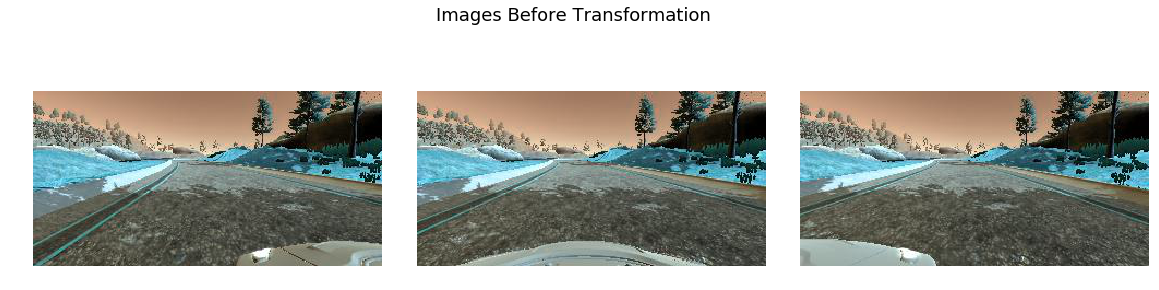

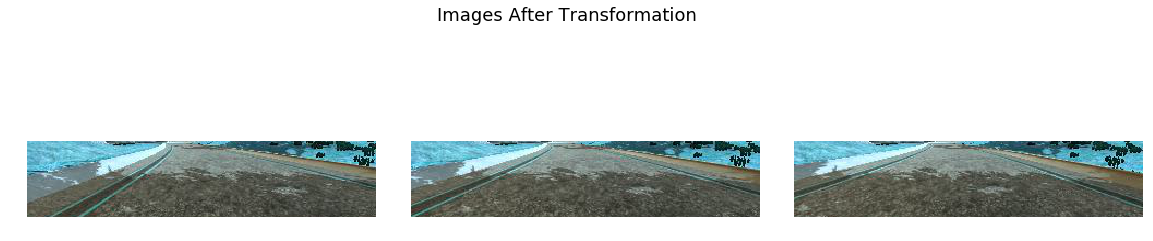

In [10]:
row = driving_log[0:1]
center_image = cv2.imread(row.center_img.values[0])
left_image = cv2.imread(row.left_img.values[0])
right_image = cv2.imread(row.right_img.values[0])

def show_img(images, title):
    gs1 = gridspec.GridSpec(1, len(images))
    plt.figure(figsize=(20,5))
    plt.suptitle(title, fontsize=18)
    gs1.update(wspace=0.1, hspace=0.5) 
    for i in range(len(images)):
        ax1 = plt.subplot(gs1[i])
        plt.imshow(images[i])
        plt.axis('off')

show_img([left_image, center_image, right_image], 'Images Before Transformation')

def crop_image(image):
    nimage = image[60:130,]
    return nimage


show_img([crop_image(left_image), crop_image(center_image), crop_image(right_image)], 'Images After Transformation')

np.shape(crop_image(left_image))


## Training Data


In [6]:
x_Data = []
y_data = []

for index, row in driving_log.iterrows():
    # Center Image
    x_Data.append(row.center_img)
    y_data.append([row.speed, row.steering_angle])

    # Left Image
    x_Data.append(row.left_img)
    y_data.append([row.speed, row.steering_angle + 0.25])
    
    # Right Image
    x_Data.append(row.right_img)
    y_data.append([row.speed, row.steering_angle - 0.25])


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_Data, y_data, test_size=0.20)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

In [9]:
np.shape(x_train)

(6974,)